In [2]:
import pandas as pd # đọc dữ liệu
import numpy as np #Xử lý dữ liệu
import matplotlib.pyplot as plt # Vẽ biểu đồ
import seaborn as sns  # Vẽ biểu đồ

In [3]:
df = pd.read_csv('AIDS_Classification_50000.csv')
df

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073,1,37,79.46339,0,1,0,100,0,1,...,1,2,0,1,0,322,469,882,754,1
1,324,0,33,73.02314,0,1,0,90,0,1,...,1,3,1,1,1,168,575,1035,1525,1
2,495,1,43,69.47793,0,1,0,100,0,1,...,1,1,0,0,0,377,333,1147,1088,1
3,1201,3,42,89.15934,0,1,0,100,1,1,...,1,3,0,0,0,238,324,775,1019,1
4,934,0,37,137.46581,0,1,0,100,0,0,...,0,3,0,0,1,500,443,1601,849,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,953,3,46,61.28204,0,0,0,90,0,1,...,1,3,0,1,1,234,402,481,1014,0
49996,1036,0,42,73.36768,0,1,0,100,0,1,...,1,3,0,0,1,369,575,514,657,0
49997,1157,0,40,78.75824,0,1,0,100,0,1,...,1,1,0,1,0,308,663,1581,863,0
49998,596,0,31,52.20371,0,0,0,100,0,1,...,1,1,0,1,1,349,440,470,865,1


In [4]:
df.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected'],
      dtype='object')

Data Insights

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      50000 non-null  int64  
 1   trt       50000 non-null  int64  
 2   age       50000 non-null  int64  
 3   wtkg      50000 non-null  float64
 4   hemo      50000 non-null  int64  
 5   homo      50000 non-null  int64  
 6   drugs     50000 non-null  int64  
 7   karnof    50000 non-null  int64  
 8   oprior    50000 non-null  int64  
 9   z30       50000 non-null  int64  
 10  preanti   50000 non-null  int64  
 11  race      50000 non-null  int64  
 12  gender    50000 non-null  int64  
 13  str2      50000 non-null  int64  
 14  strat     50000 non-null  int64  
 15  symptom   50000 non-null  int64  
 16  treat     50000 non-null  int64  
 17  offtrt    50000 non-null  int64  
 18  cd40      50000 non-null  int64  
 19  cd420     50000 non-null  int64  
 20  cd80      50000 non-null  in

Data Visualization

In [42]:
# numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# numeric_columns = [
#     col for col in numeric_columns
#     if df[col].min() != 0 or df[col].max() != 1]

# plt.figure(figsize=(16, 12))

# for i, col in enumerate(numeric_columns):
#     plt.subplot(5, 5, i + 1)
#     sns.boxplot(x=df[col])
#     plt.title(col)

# plt.tight_layout()
# plt.show()

In [43]:
outlier_columns_to_check = ['age', 'wtkg', 'karnof',
                            'preanti', 'cd40', 'cd420', 'cd80', 'cd820']

In [44]:
# def handle_outliers(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     df[column] = df[column].apply(
#         lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

#     return df

In [45]:
# for column in outlier_columns_to_check:
#     df = handle_outliers(df, column)

In [46]:
#  numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# numeric_columns = [
#     col for col in numeric_columns if df[col].min() != 0 or df[col].max() != 1]


# plt.figure(figsize=(16, 12))

# for i, col in enumerate(numeric_columns):
#     plt.subplot(5, 5, i + 1)
#     sns.boxplot(x=df[col])
#     plt.title(col)

# plt.tight_layout()
# plt.show()

In [6]:
df.describe(percentiles=[0, .25, .50, .75, 1]
            ).T.style.background_gradient(cmap='inferno')

,count,mean,std,min,0%,25%,50%,75%,100%,max
time,50000.000000,877.369780,307.288688,66.000000,66.000000,542.000000,1045.000000,1136.000000,1231.000000,1231.000000
trt,50000.000000,1.384800,1.233272,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000,3.000000
age,50000.000000,34.164020,7.091152,12.000000,12.000000,29.000000,34.000000,39.000000,68.000000,68.000000
wtkg,50000.000000,75.861991,12.028730,42.361620,42.361620,68.253682,74.054115,81.142185,149.830870,149.830870
hemo,50000.000000,0.033480,0.179888,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
homo,50000.000000,0.653540,0.475847,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
drugs,50000.000000,0.132220,0.338733,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
karnof,50000.000000,96.831560,5.091788,76.000000,76.000000,90.000000,100.000000,100.000000,100.000000,100.000000
oprior,50000.000000,0.042300,0.201275,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
z30,50000.000000,0.640880,0.479747,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000


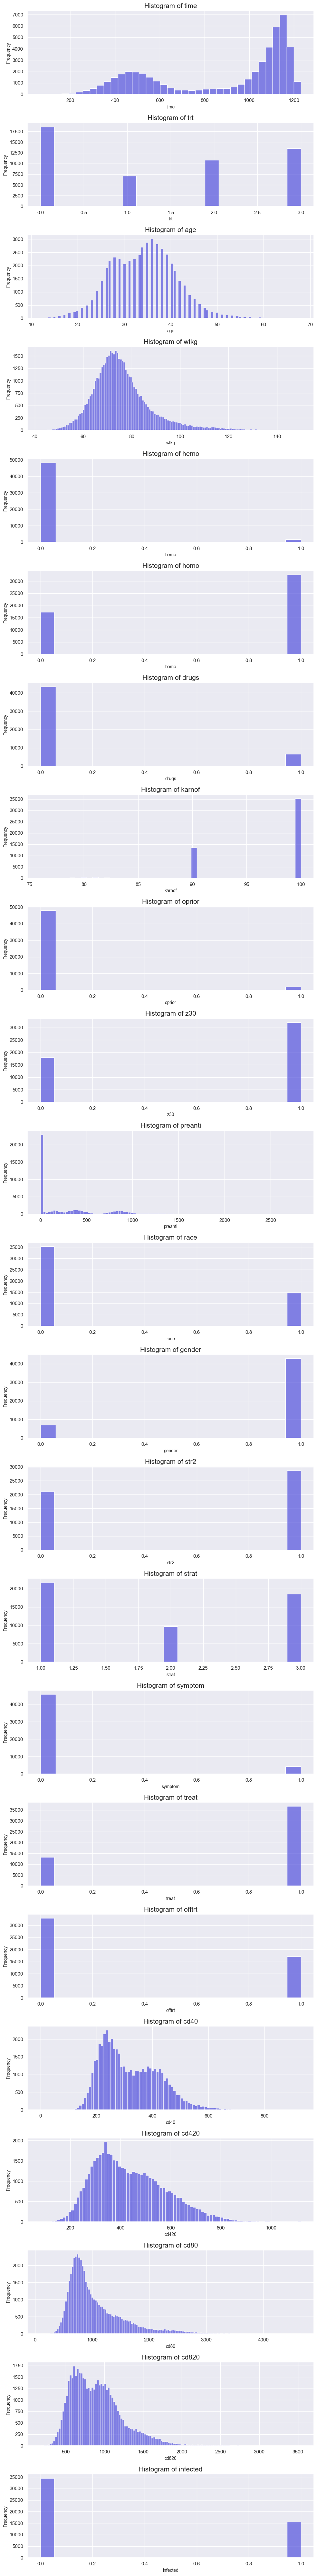

In [7]:
sns.set(font_scale=1)

fig, ax = plt.subplots(len(df.columns), figsize=(10, 80))

color = '#5D5CDE'

for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, ax=ax[i], color=color)
    ax[i].set_title(f'Histogram of {col}', fontsize=15)
    ax[i].set_xlabel(col, fontsize=10)
    ax[i].set_ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

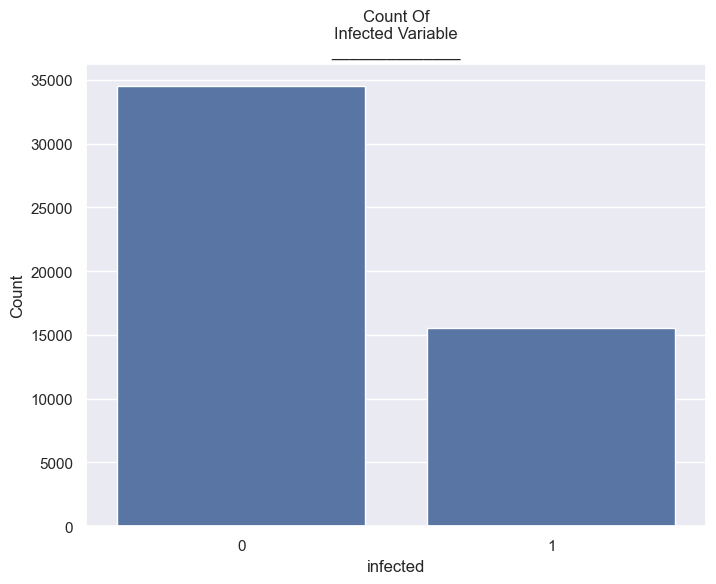

In [8]:
# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x=df['infected'], ax=ax)

# Thêm tiêu đề và nhãn trục
ax.set_title('Count Of\nInfected Variable\n______________')
ax.set_xlabel('infected')
ax.set_ylabel('Count')


# Hiển thị biểu đồ
plt.show()

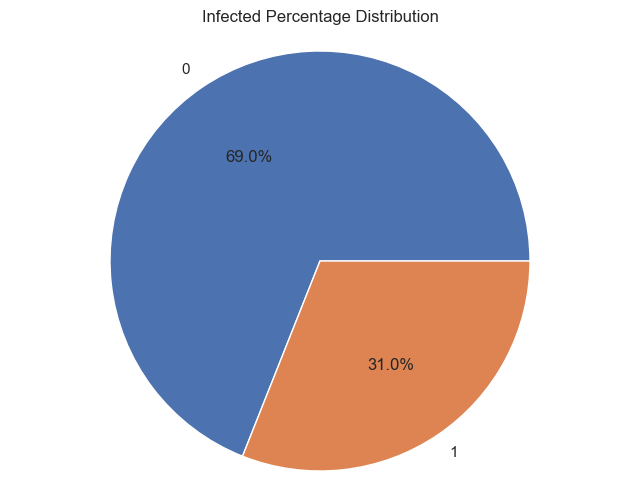

In [50]:
plt.figure(figsize=(8, 6))
infected_counts = df['infected'].value_counts()
labels = infected_counts.index
sizes = infected_counts.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Infected Percentage Distribution')
plt.axis('equal')
plt.show()

In [51]:
cont_cols = ['time', 'age', 'wtkg', 'preanti',
             'cd40', 'cd420', 'cd80', 'cd820']
label = 'infected'
dis_cols = list(set(df.columns) - set([*cont_cols, label]))

len(cont_cols), len(dis_cols)

(8, 14)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

def mPlotter(rows, cols, figsize, cont_cols, title):
    plt.suptitle(title)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    

    # Create a colorblind-friendly palette  
    palette = sns.color_palette("colorblind", len(cont_cols))

    # Create a function to add a colorbar to each subplot
    def cb(ax):
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(ax.collections[0], cax=cax)

    return axes.ravel(), palette, cb

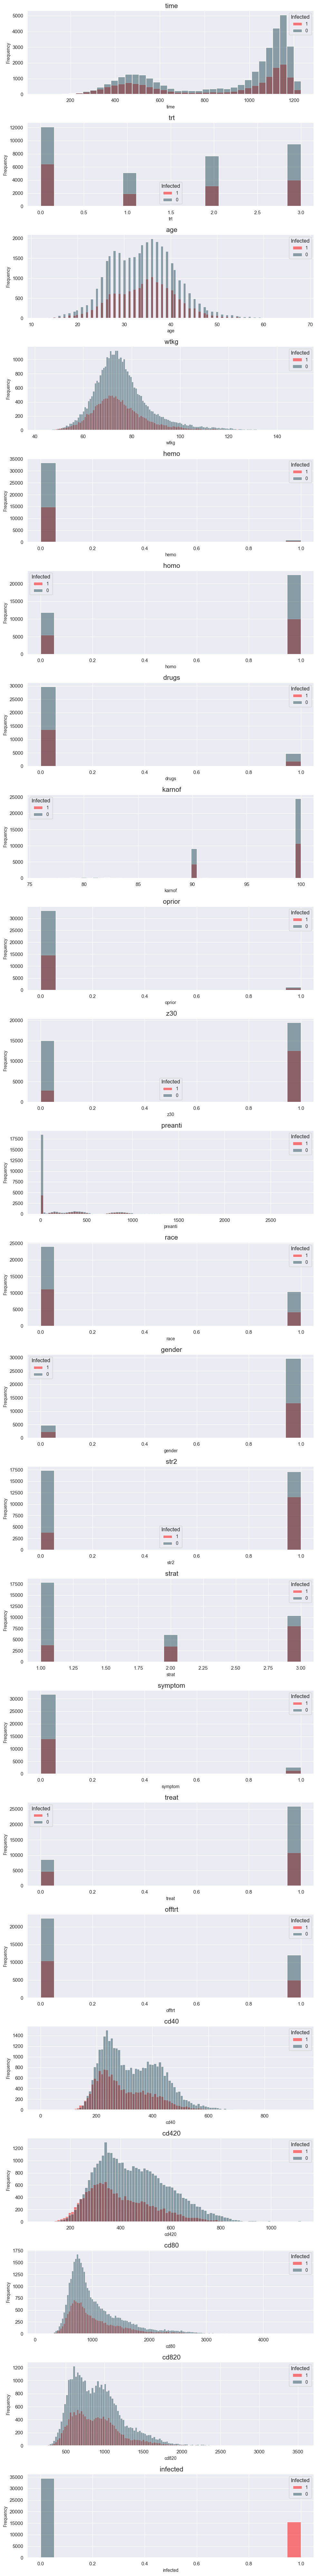

In [11]:

sns.set(font_scale=1)

fig, ax = plt.subplots(len(df.columns), figsize=(10, 80))

for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, ax=ax[i], hue="infected", palette=[
                 '#254E58', '#FF0000'])
    ax[i].set_title(f' {col}', fontsize=15)
    ax[i].set_xlabel(col, fontsize=10)
    ax[i].set_ylabel('Frequency', fontsize=10)
    ax[i].legend(title='Infected', labels=['1', '0'], fontsize=10)

plt.tight_layout()
plt.show()